# *Merged Jupyter Notebook*

<hr><font color="green"><h1>from file: 05-Matplotlib\2\Activities\02-Ins_PandasPlot\Solved\avg_state_rain</h1></font>

In [1]:
# We will comment this out so you can run each section.
# %matplotlib notebook

In [2]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

### Using MatplotLib to Chart a DataFrame

In [5]:
# Load in csv
rain_df = pd.read_csv("Resources/avg_rain_state.csv")
rain_df.head()

,State,Inches,Milli­metres,Rank
0,Alabama,58.3,1480,4
1,Alaska,22.5,572,39
2,Arizona,13.6,345,47
3,Arkansas,50.6,1284,8
4,California,22.2,563,40


In [6]:
# Set x axis and tick locations
x_axis = np.arange(len(rain_df))
tick_locations = [value for value in x_axis]

## Notice this next cell is only using matplotlib for the chart


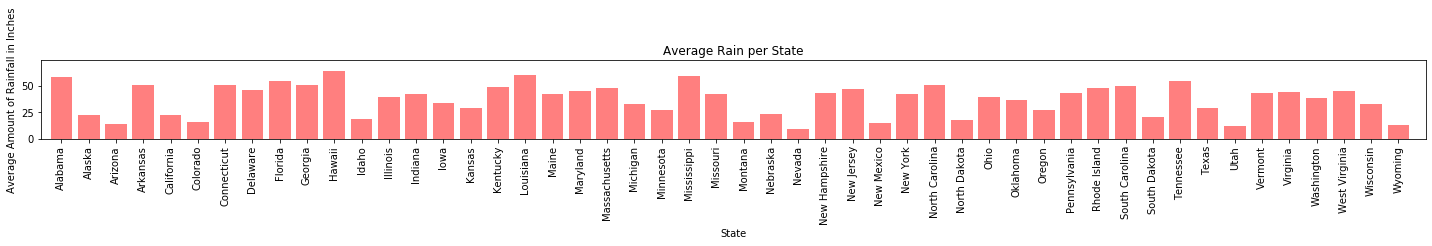

In [8]:
# Create a list indicating where to write x labels and set figure size to adjust for space,figsize is measured in inches
plt.figure(figsize=(20,3))
#remember selecting a single column will give you a Series
#color options can be found here https://matplotlib.org/3.1.0/tutorials/colors/colors.html
plt.bar(x_axis, rain_df["Inches"], color='r', alpha=0.5, align="center")
plt.xticks(tick_locations, rain_df["State"], rotation="vertical")

# Set x and y limits
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(rain_df["Inches"])+10)

# Set a Title and labels
plt.title("Average Rain per State")
plt.xlabel("State")
plt.ylabel("Average Amount of Rainfall in Inches")

# Save our graph and show the graph
# tigh_layout() adjusts the visual of our graph making it easier to see
plt.tight_layout()
# plt.savefig("../Images/avg_state_rain.png")
plt.show()

### Using Pandas to Chart a DataFrame

In [9]:
# Filter the DataFrame down only to those columns to chart
state_and_inches = rain_df[["State","Inches"]]

# Set the index to be "State" so they will be used as labels
state_and_inches = state_and_inches.set_index("State")

state_and_inches.head()

,Inches
State,
Alabama,58.3
Alaska,22.5
Arizona,13.6
Arkansas,50.6
California,22.2


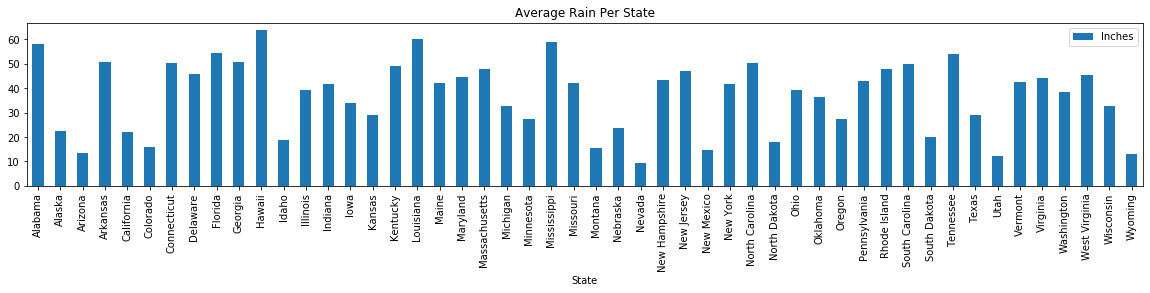

<Figure size 432x288 with 0 Axes>

In [10]:
# Use DataFrame.plot() in order to create a bar chart of the data
#For Pandas we set the "kind" to determine which type of chart we want
#The rest is almost he same as Pandas
state_and_inches.plot(kind="bar", figsize=(20,3))

# Set a title for the chart
plt.title("Average Rain Per State")

plt.show()
plt.tight_layout()

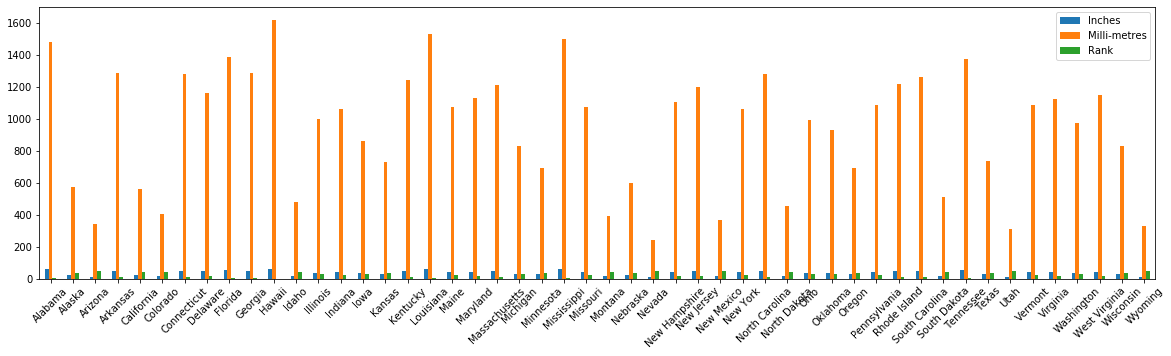

<Figure size 432x288 with 0 Axes>

In [11]:
# Pandas can also plot multiple columns if the DataFrame includes them
# Note this is charting all numeric columns in your dataframe
multi_plot = rain_df.plot(kind="bar", figsize=(20,5))

# PandasPlot.set_xticklabels() can be used to set the tick labels as well
multi_plot.set_xticklabels(rain_df["State"], rotation=45)

plt.show()
plt.tight_layout()

<hr><font color="green"><h1>from file: 05-Matplotlib\2\Activities\04-Ins_GroupPlots\Solved\plotting_groups</h1></font>

In [ ]:
# %matplotlib notebook

In [12]:
# Import Dependencies
import matplotlib.pyplot as plt
import pandas as pd

In [13]:
# Import our data into pandas from CSV
used_string = 'Resources/used_cars.csv'
used_car_df = pd.read_csv(used_string)

used_car_df

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,stk_year,transmission,door_count,seat_count,fuel_type,date_created,date_last_seen,price_eur
0,mercedes-benz,124,236842,1994,2000,81,None,man,None,None,gasoline,2015-12-13 13:59:29.155164+00,2015-12-28 03:51:00.703842+00,3200.37
1,bmw,m3,199000,1993,1995,85,None,man,None,None,gasoline,2015-12-13 13:59:29.184036+00,2016-02-11 03:22:38.221928+00,1300.15
2,skoda,fabia,0,2004,1197,66,None,man,4,5,gasoline,2015-12-13 13:59:29.213434+00,2016-02-11 14:41:20.698835+00,14991.67
3,audi,a8,201000,2008,1200,47,None,man,None,None,gasoline,2015-12-13 13:59:29.237329+00,2016-02-11 03:22:39.656896+00,15501.74
4,opel,zafira,230000,2003,2172,92,None,man,4,7,diesel,2015-12-13 13:59:29.263377+00,2015-12-16 03:19:12.161469+00,1500.19
5,honda,civic,96000,1998,1396,66,None,man,4,5,gasoline,2015-12-13 13:59:29.3276+00,2015-12-16 03:19:12.222902+00,2200.26
6,nissan,note,65959,2006,1386,65,None,man,4,5,gasoline,2015-12-13 13:59:29.367914+00,2015-12-18 23:19:56.322226+00,4570.50
7,opel,zafira,164000,2006,1910,88,None,auto,4,7,diesel,2015-12-13 13:59:29.402203+00,2015-12-21 22:48:31.028456+00,5900.67
8,hyundai,NaN,155000,2007,1900,88,None,man,None,None,gasoline,2015-12-13 13:59:29.460842+00,2015-12-15 04:32:52.821758+00,2800.30
9,ford,focus,252000,2004,1753,74,None,man,4,5,diesel,2015-12-13 13:59:29.488079+00,2016-02-11 03:22:40.023928+00,1950.22


In [14]:
# Create a group based on the values in the 'maker' column
maker_group = used_car_df.groupby('maker')

# Count how many times each maker appears in our group
count_makers = maker_group['maker'].count()

count_makers

maker
audi              6
bmw              11
chevrolet         1
citroen           1
fiat              2
ford              4
honda             1
hyundai           1
kia               3
mazda             1
mercedes-benz     5
mitsubishi        1
nissan            2
opel              2
seat              1
skoda             5
suzuki            1
toyota            1
volvo             1
Name: maker, dtype: int64

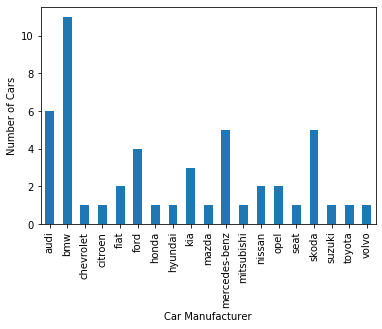

<Figure size 432x288 with 0 Axes>

In [15]:
# Create a bar chart based off of the group series from before
count_chart = count_makers.plot(kind='bar')

# Set the xlabel and ylabel using class methods
count_chart.set_xlabel("Car Manufacturer")
count_chart.set_ylabel("Number of Cars")


plt.show()
plt.tight_layout()

<hr><font color="green"><h1>from file: 05-Matplotlib\2\Activities\07-Ins_PandasMultiLine\Solved\unemploy_chart</h1></font>

In [20]:
# Dependencies
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [21]:
# Read CSV
unemployed_data_one = pd.read_csv("Resources/unemployment_2010-2011.csv")
unemployed_data_two = pd.read_csv("Resources/unemployment_2012-2014.csv")

# Merge our two data frames together
combined_unemployed_data = pd.merge(unemployed_data_one, unemployed_data_two, on="Country Name")
combined_unemployed_data.head()

,Country Name,Country Code_x,2010,2011,Country Code_y,2012,2013,2014
0,Afghanistan,AFG,20.600000,20.900000,AFG,19.700001,21.100000,20.799999
1,Angola,AGO,10.800000,10.700000,AGO,10.700000,10.600000,10.500000
2,Albania,ALB,25.799999,27.000000,ALB,28.299999,28.700001,29.200001
3,Arab World,ARB,25.022214,28.117516,ARB,29.113212,29.335306,29.704569
4,United Arab Emirates,ARE,9.800000,9.800000,ARE,9.800000,9.900000,10.000000


In [22]:
# Delete the duplicate 'Country Code' column and rename the first one back to 'Country Code'
del combined_unemployed_data['Country Code_y']
combined_unemployed_data = combined_unemployed_data.rename(columns={"Country Code_x":"Country Code"})
combined_unemployed_data.head()

,Country Name,Country Code,2010,2011,2012,2013,2014
0,Afghanistan,AFG,20.600000,20.900000,19.700001,21.100000,20.799999
1,Angola,AGO,10.800000,10.700000,10.700000,10.600000,10.500000
2,Albania,ALB,25.799999,27.000000,28.299999,28.700001,29.200001
3,Arab World,ARB,25.022214,28.117516,29.113212,29.335306,29.704569
4,United Arab Emirates,ARE,9.800000,9.800000,9.800000,9.900000,10.000000


In [23]:
# Set the 'Country Code' to be our index for easy referencing of rows
combined_unemployed_data = combined_unemployed_data.set_index("Country Code")
combined_unemployed_data.head()

,Country Name,2010,2011,2012,2013,2014
Country Code,,,,,,
AFG,Afghanistan,20.600000,20.900000,19.700001,21.100000,20.799999
AGO,Angola,10.800000,10.700000,10.700000,10.600000,10.500000
ALB,Albania,25.799999,27.000000,28.299999,28.700001,29.200001
ARB,Arab World,25.022214,28.117516,29.113212,29.335306,29.704569
ARE,United Arab Emirates,9.800000,9.800000,9.800000,9.900000,10.000000
...,...,...,...,...,...,...
YEM,"Yemen, Rep.",30.299999,30.000000,30.200001,30.200001,29.900000
ZAF,South Africa,50.799999,50.099998,52.200001,51.400002,52.599998
COD,"Congo, Dem. Rep.",12.300000,12.300000,12.300000,12.200000,11.900000


In [24]:
# Collect the mean unemployment rates for the world
average_unemployment = combined_unemployed_data.mean()
average_unemployment.head()

2010    17.892957
2011    17.902713
2012    18.148142
2013    18.100429
2014    17.943539
dtype: float64

In [25]:
# Collect the years where data was collected
# this is getting the keys of the series (this will become our x-axis)
years = average_unemployment.keys()
years

Index(['2010', '2011', '2012', '2013', '2014'], dtype='object')

## notice this next cell is using Matplotlib to create the chart

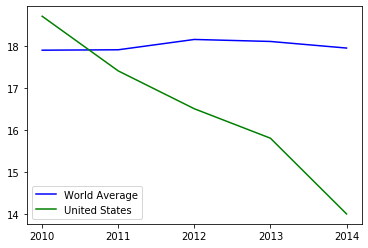

In [26]:
# Plot the world average as a line chart
world_avg, = plt.plot(years, average_unemployment, color="blue", label="World Average" )

# Plot the unemployment values for a single country
country_one, = plt.plot(years, combined_unemployed_data.loc['USA',["2010","2011","2012","2013","2014"]], 
                        color="green",label=combined_unemployed_data.loc['USA',"Country Name"])

# Create a legend for our chart
plt.legend(handles=[world_avg, country_one], loc="best")

# Show the chart
plt.show()

## This next cell is using Pandas

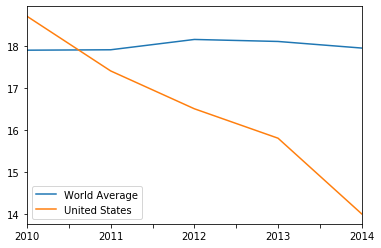

In [27]:
average_unemployment.plot(label="World Average")
combined_unemployed_data.loc['USA', "2010":"2014"].plot(label="United States")
plt.legend()
plt.show()